# [Data](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)
* [Color Name](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
* [Palette](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)
* [Set_Style](http://seaborn.pydata.org/generated/seaborn.set_style.html?highlight=s)

# Violin Plot (Keman Grafiği)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
df = pd.read_csv(url, sep = "|")
df = df.dropna()
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 44.2+ KB


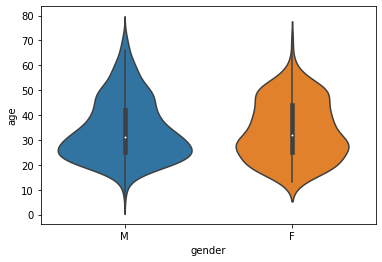

In [4]:
sns.violinplot(data = df, x = "gender", y = "age");

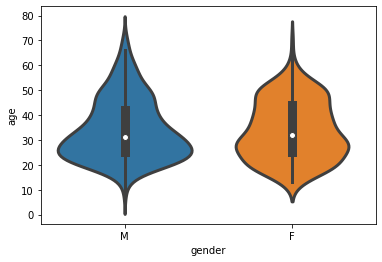

In [5]:
sns.violinplot(data = df, x = "gender", y = "age", linewidth = 3);

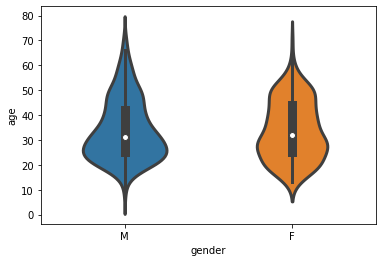

In [6]:
sns.violinplot(data = df, x = "gender", y = "age", linewidth = 3, width = 0.5);

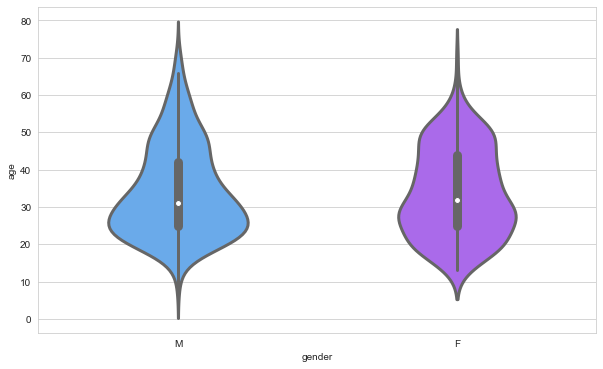

In [7]:
sns.set_style("whitegrid")

width = 10
height = 6
plt.figure(figsize = (width, height))
sns.violinplot(data = df, x = "gender", y = "age", linewidth = 3, width = 0.5, palette = "cool");

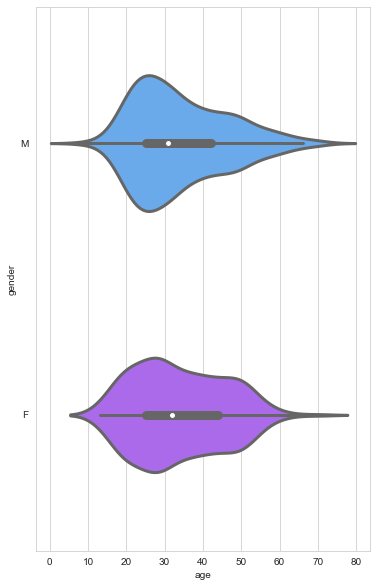

In [8]:
width = 10
height = 6
plt.figure(figsize = (height, width))
sns.violinplot(data = df, x = "age", y = "gender", linewidth = 3, width = 0.5, palette = "cool");

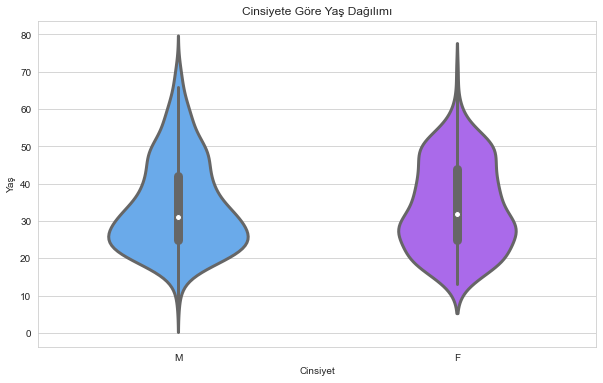

In [9]:
# Keman grafiğinizin her grubu için gözlem sayısını belirlemek iyi bir uygulamadır.
# Gerçekten de, 10 gözlemi olan bir grup, altındaki mesajı büyük ölçüde etkileyebilecek olan 10.000'li bir grupla aynı görünebilir.

width = 10
height = 6
plt.figure(figsize = (width, height))
ax = sns.violinplot(data = df, x = "gender", y = "age", linewidth = 3, width = 0.5, palette = "cool")
plt.title("Cinsiyete Göre Yaş Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Yaş");

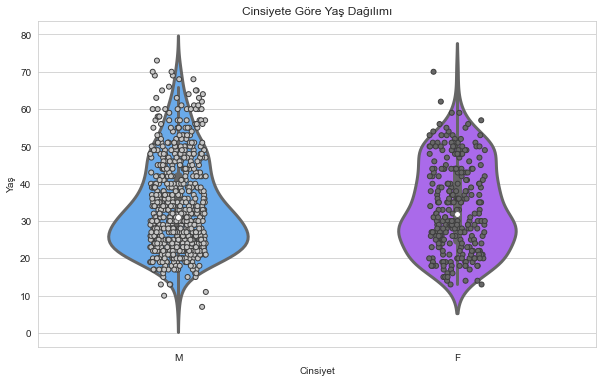

In [10]:
width = 10
height = 6
plt.figure(figsize = (width, height))
ax = sns.stripplot(data = df, x = "gender", y = "age", jitter = True, palette = "Greys",  linewidth = 1 , size = 5)
ax = sns.violinplot(data = df, x = "gender", y = "age", linewidth = 3, width = 0.5, palette = "cool")
plt.title("Cinsiyete Göre Yaş Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Yaş");

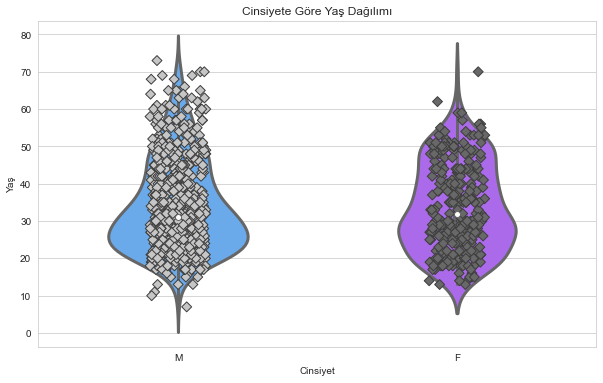

In [11]:
width = 10
height = 6
plt.figure(figsize = (width, height))
ax = sns.stripplot(data = df, x = "gender", y = "age", jitter = True, palette = "Greys",  linewidth = 1, size = 7, marker = "D")
ax = sns.violinplot(data = df, x = "gender", y = "age", linewidth = 3, width = 0.5, palette = "cool")
plt.title("Cinsiyete Göre Yaş Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Yaş");

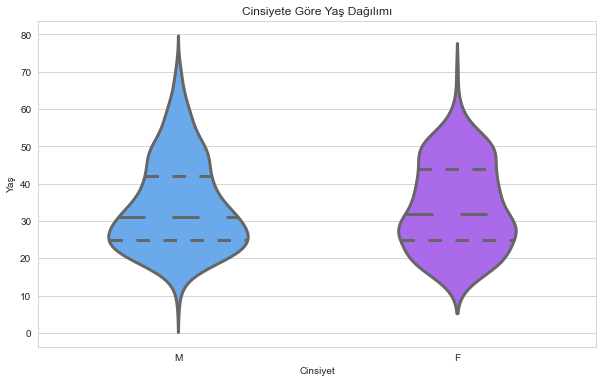

In [12]:
width = 10
height = 6
plt.figure(figsize = (width, height))
ax = sns.violinplot(data = df, x = "gender", y = "age", linewidth = 3, width = 0.5, palette = "cool", inner = "quartile")
plt.title("Cinsiyete Göre Yaş Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Yaş");

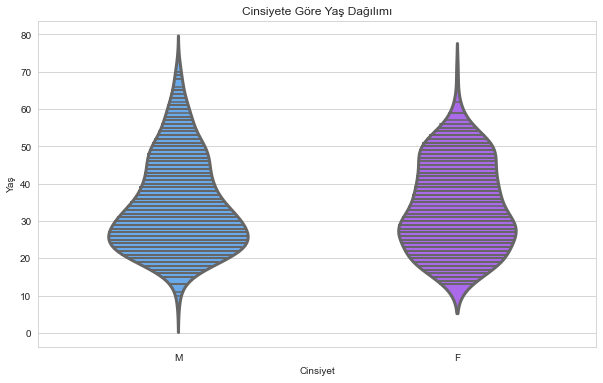

In [13]:
width = 10
height = 6
plt.figure(figsize = (width, height))
ax = sns.violinplot(data = df, x = "gender", y = "age", linewidth = 3, width = 0.5, palette = "cool", inner = "stick")
plt.title("Cinsiyete Göre Yaş Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Yaş");

In [14]:
# Konum etiketleri için grup ve medyan başına gözlem sayısını hesaplayın.

median = df.groupby(["gender"])["age"].median()
median

gender
F    32
M    31
Name: age, dtype: int64

In [15]:
median = df.groupby(["gender"])["age"].median().values
median

array([32, 31], dtype=int64)

In [16]:
nobs = df["gender"].value_counts()
nobs

M    670
F    273
Name: gender, dtype: int64

In [17]:
nobs = df["gender"].value_counts().values
nobs

array([670, 273], dtype=int64)

In [18]:
nobs = [str(x) for x in nobs.tolist()]
nobs

['670', '273']

In [19]:
nobs = ["n:" + i for i in nobs]
nobs

['n:670', 'n:273']

In [20]:
pos = range(len(nobs))
pos

range(0, 2)

* [ax.text params](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.axes.Axes.text.html)

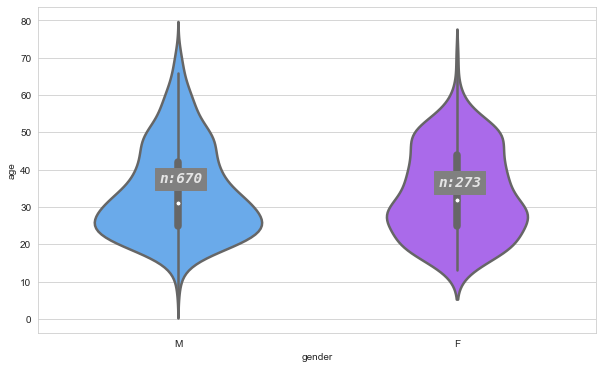

In [21]:
width = 10
height = 6
plt.figure(figsize = (width, height))
ax = sns.violinplot(data = df, x = "gender", y = "age", linewidth = 2.5, width = 0.6, palette = "cool")
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick] + 0.01, median[tick] + 4.5, nobs[tick], 
            horizontalalignment = "center", size = "x-large", color = "w", weight = "semibold",
            style = "italic", family = "monospace", alpha = 0.8, backgroundcolor = "grey")

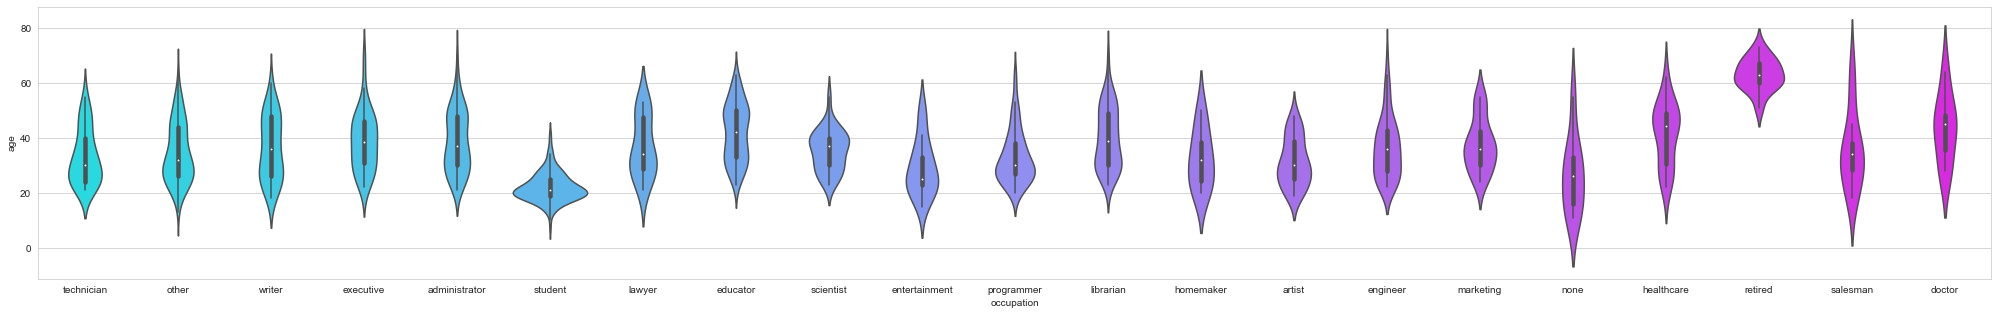

In [22]:
width = 35
height = 5
plt.figure(figsize = (width, height))
ax = sns.violinplot(data = df, x = "occupation", y = "age", palette = "cool");

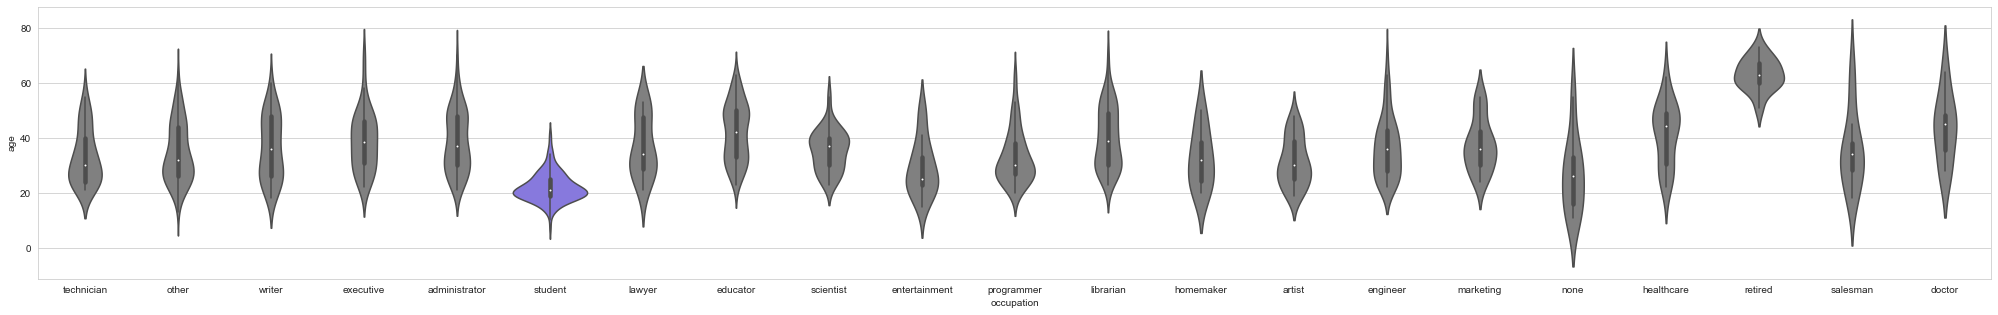

In [23]:
my_pal = {occupation: "mediumslateblue" if occupation == "student" else "grey" for occupation in df.occupation.unique()}
width = 35
height = 5
plt.figure(figsize = (width, height))
ax = sns.violinplot(data = df, x = "occupation", y = "age", palette = my_pal);

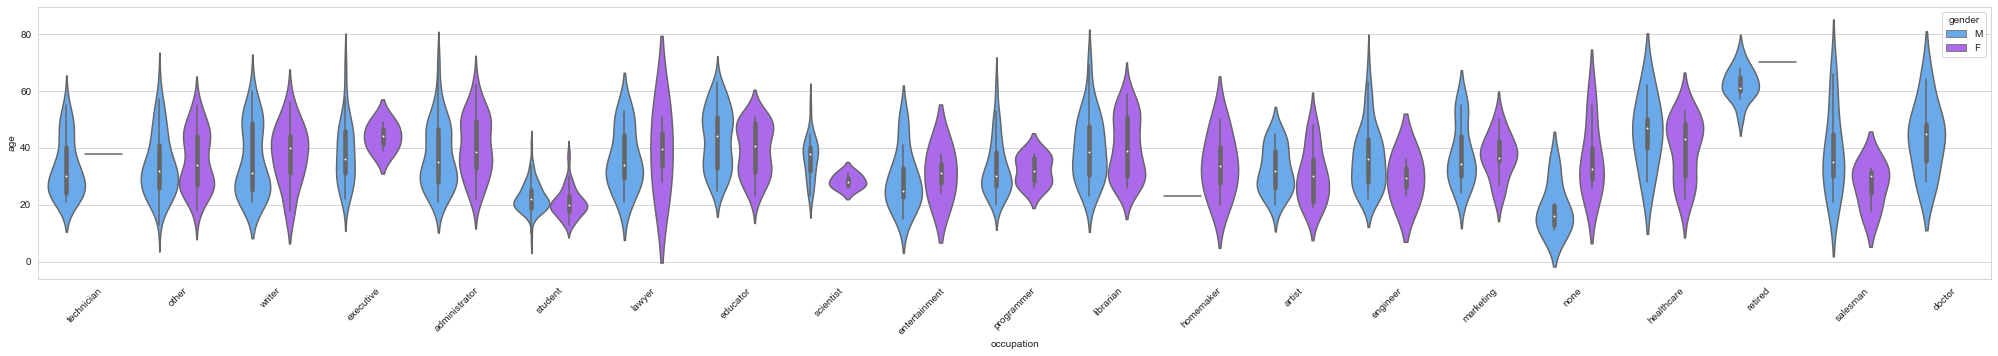

In [24]:
width = 35
height = 5
plt.figure(figsize = (width, height))
plt.xticks(rotation = 45)
ax = sns.violinplot(data = df, x = "occupation", y = "age", hue = "gender", palette = "cool");

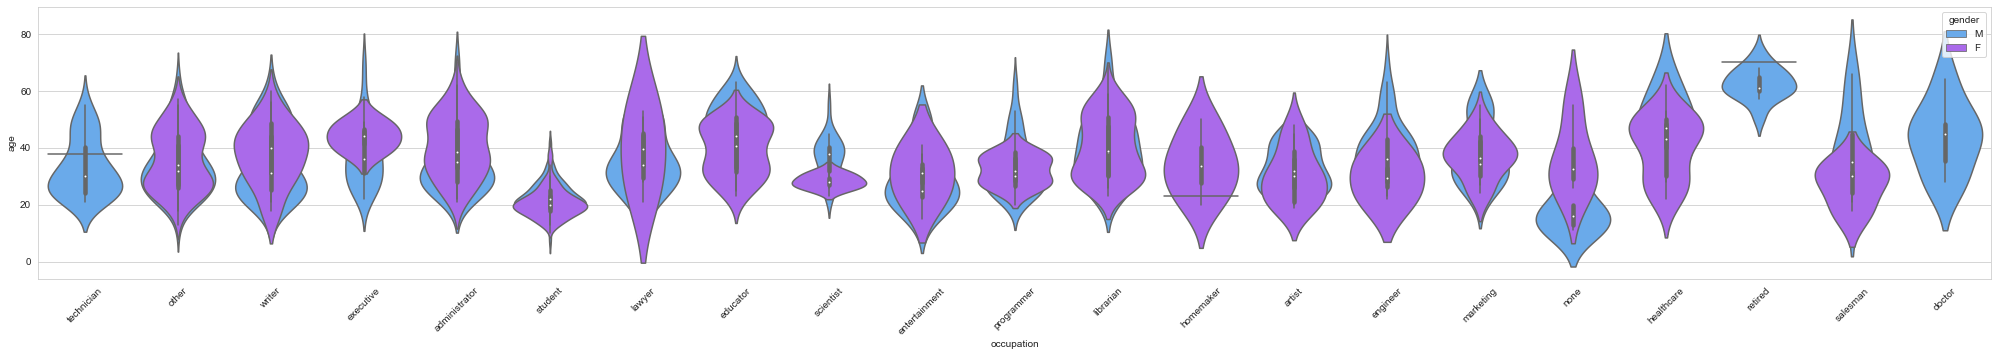

In [25]:
width = 35
height = 5
plt.figure(figsize = (width, height))
plt.xticks(rotation = 45)
sns.set_style("whitegrid")
ax = sns.violinplot(data = df, x = "occupation", y = "age", hue = "gender", palette = "cool", dodge = False);

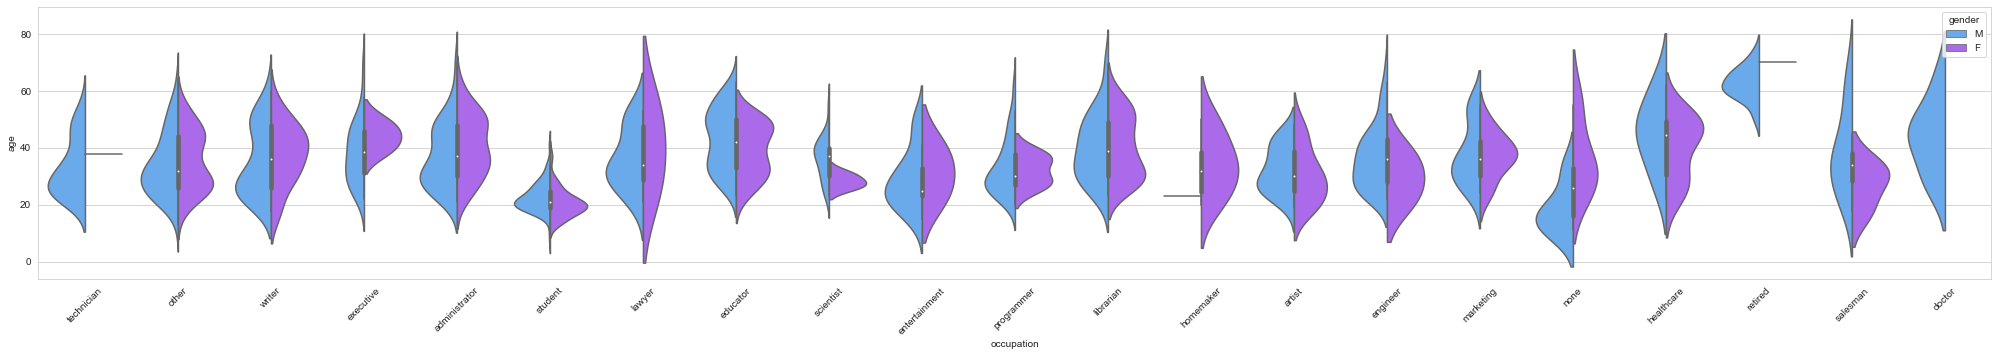

In [26]:
width = 35
height = 5
plt.figure(figsize = (width, height))
plt.xticks(rotation = 45)
ax = sns.violinplot(data = df, x = "occupation", y = "age", hue = "gender", palette = "cool", split = True);

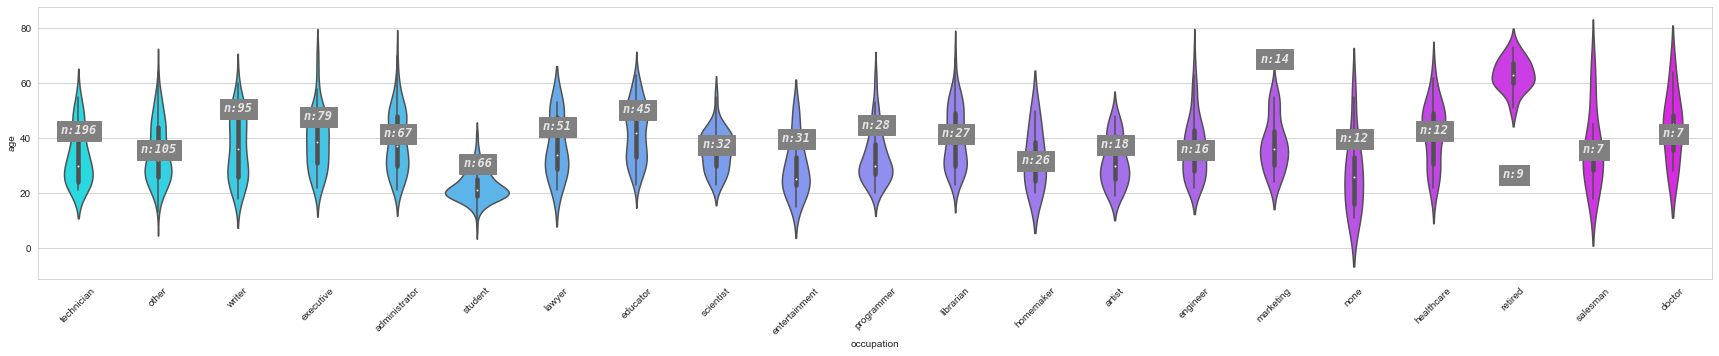

In [27]:
median = df.groupby(["occupation"])["age"].median().values
nobs = df["occupation"].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n:" + i for i in nobs]
pos = range(len(nobs))

width = 30
height = 5
plt.figure(figsize = (width, height))
plt.xticks(rotation = 45)
ax = sns.violinplot(data = df, x = "occupation", y = "age", palette = "cool")
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick] + 0.01, median[tick] + 4.5, nobs[tick], horizontalalignment = "center", size = "large", color = "w", weight = "semibold",
            style = "italic", family = "monospace", alpha = 0.8, backgroundcolor = "grey")

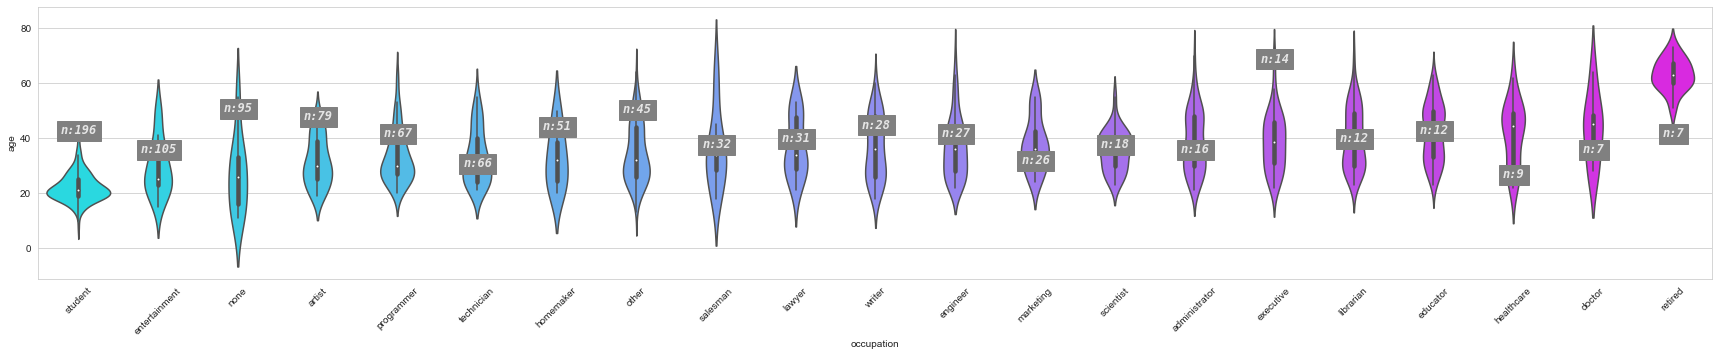

In [28]:
ordered = df.groupby(by=["occupation"])["age"].median().sort_values().index
median = df.groupby(["occupation"])["age"].median().values
nobs = df["occupation"].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n:" + i for i in nobs]
pos = range(len(nobs))

width = 30
height = 5
plt.figure(figsize = (width, height))
plt.xticks(rotation = 45)
ax = sns.violinplot(data = df, x = "occupation", y = "age", palette = "cool", order = ordered)
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick] + 0.01, median[tick] + 4.5, nobs[tick], horizontalalignment = "center", size = "large", color = "w", weight = "semibold",
            style = "italic", family = "monospace", alpha = 0.8, backgroundcolor = "grey")